<a href="https://colab.research.google.com/github/feist000/Project/blob/master/%EA%B3%A0%EC%96%91%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%85%98/PPT/%EC%B9%B4%EC%B9%B4%EC%98%A4%EC%B1%84%EB%84%90_buildup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 구글 연동 > 파일 폴더 연결

In [3]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm.notebook import tqdm
import pandas as pd 
from pandas.io import gbq

In [2]:
! pip install selenium

     |████████████████████████████████| 911kB 2.7MB/s 


In [4]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive이기 때문에 변동하지마러
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks/house_price_data'

/content/drive/My Drive/Colab Notebooks/house_price_data


In [ ]:
%ls

food191.csv            seezn_20191128_20191231.xlsx  test.csv
food236.csv            seezn_20200101_20200229.xlsx  tiving_all.csv
netflix_all.csv        seezn_20200301_20200430.xlsx  train.csv
ratings_test.txt       seezn_20200501_20200631.xlsx  watcha_all.csv
ratings_train.txt      seezn_20200701_20200831.xlsx  wavve_all.csv
ratings.txt            seezn_20200901_20200924.xlsx
sample_submission.csv  seezn_all.csv


In [ ]:
! pip install selenium

     |████████████████████████████████| 911kB 3.5MB/s 


In [ ]:
seezn = pd.read_csv("seezn_all.csv")

In [ ]:
seezn

,Unnamed: 0,Unnamed: 0.1,title,nickname,datetime,content
0,0,0,우선 런칭 기념으로 ' 시즌 플레인 ' 첫 달 무료 이벤트를 진행 중이다. 좋은지 ...,뉴턴의사과,2019. 12. 12. 12:15,Play Your Seezn!\n#시즌 #뉴미디어 #시즌플레인\n『 스마트폰으로 즐...
1,1,1,올레 tv 모바일이 새롭게 변한 시즌 (seezn) 런칭 이벤트!,비주\n(heena_mom),2019. 12. 17. 22:29,안녕하세요 비주입니다~^^\nKT 고객이시라면 올레 tv 모바일을 잘 알고 계실 거...
2,2,2,새로운 모바일 미디어 시즌(Seezn) 런칭 소식,경아신랑,2019. 12. 12. 17:36,어느 날 제 아이폰에 있던 KT 올레 TV 모바일앱이 사라졌습니다. 제가 심심할 ...
3,3,3,올레 TV 모바일의 놀라운 변신,대니얼과 제이미,2019. 12. 31. 16:40,아직도 텔레비젼으로만 지상파와 케이블 방송을 시청하는 분들은 안 계시겠죠. 저처럼 ...
4,4,4,올레TV 모바일이 KT seezn 시즌으로! 다양한 콘텐츠 즐겨볼까,Cwon\n(lucky_box7),2019. 12. 18. 9:39,KT 요금제 가입 고객이라면 지금까지 쏠쏠하게 즐겼던 올레TV 모바일이 최근 see...
...,...,...,...,...,...,...
1777,218,292,"청량한 로맨스 대만드라마 상견니 줄거리/ 명장면,명대사 / 상견니주접",알미,2020. 9. 15. 19:16,"요즘은 재미있는 드라마, 영화 찾아 보는게 소소한 나의 힐링이다. \n그동안은 내 ..."
1778,219,293,NaN,ADBall대박기원,2020. 9. 4. 10:28,[데일리한국 장정우 기자] KT의 온라인동영상서비스(OTT) 시즌(Seezn)에서 ...
1779,220,296,NaN,순딩순딩,2020. 9. 12. 18:17,
1780,221,298,상견니(想見你) 리뷰 아닌 몇 가지 이야기들 - 6,쥰,2020. 9. 12. 14:46,"작가 임흔혜 : 사실, 우리가 쓴 세 명의 청소년 주인공 캐릭터들은 특별한 것들이 ..."


In [ ]:
seezn_test = seezn[['title','content']]; seezn_test

,title,content
0,우선 런칭 기념으로 ' 시즌 플레인 ' 첫 달 무료 이벤트를 진행 중이다. 좋은지 ...,Play Your Seezn!\n#시즌 #뉴미디어 #시즌플레인\n『 스마트폰으로 즐...
1,올레 tv 모바일이 새롭게 변한 시즌 (seezn) 런칭 이벤트!,안녕하세요 비주입니다~^^\nKT 고객이시라면 올레 tv 모바일을 잘 알고 계실 거...
2,새로운 모바일 미디어 시즌(Seezn) 런칭 소식,어느 날 제 아이폰에 있던 KT 올레 TV 모바일앱이 사라졌습니다. 제가 심심할 ...
3,올레 TV 모바일의 놀라운 변신,아직도 텔레비젼으로만 지상파와 케이블 방송을 시청하는 분들은 안 계시겠죠. 저처럼 ...
4,올레TV 모바일이 KT seezn 시즌으로! 다양한 콘텐츠 즐겨볼까,KT 요금제 가입 고객이라면 지금까지 쏠쏠하게 즐겼던 올레TV 모바일이 최근 see...
...,...,...
1777,"청량한 로맨스 대만드라마 상견니 줄거리/ 명장면,명대사 / 상견니주접","요즘은 재미있는 드라마, 영화 찾아 보는게 소소한 나의 힐링이다. \n그동안은 내 ..."
1778,NaN,[데일리한국 장정우 기자] KT의 온라인동영상서비스(OTT) 시즌(Seezn)에서 ...
1779,NaN,
1780,상견니(想見你) 리뷰 아닌 몇 가지 이야기들 - 6,"작가 임흔혜 : 사실, 우리가 쓴 세 명의 청소년 주인공 캐릭터들은 특별한 것들이 ..."


In [ ]:
seezn_list = seezn_test[['title','content']].values.tolist()

print(len(seezn_list))
seezn_list

1782


[["우선 런칭 기념으로 ' 시즌 플레인 ' 첫 달 무료 이벤트를 진행 중이다. 좋은지 나쁜지는 좀 써봐야 아는데 한 달 무료 이벤트가 진행 중이니 한번 사용해 보는 것도 좋다.",
  "Play Your Seezn!\n#시즌 #뉴미디어 #시즌플레인\n『 스마트폰으로 즐기는 미디어 세상 '시즌' 』\n글 그림 | 뉴턴의사과 스마트폰으로 많은 걸 할 수 있다. 그리고 앞으로 할 수 있는 것은 더 늘어갈 거라는 건 모두 알고 있다. 아날로그적이 것들이 사라지는 것은 아쉽지만 이제는 하루라도 스마트폰이 없이 생활하려면 정말 불편하지 않을까 생각해본다. 생활을 편리하게 해주는 다양한 앱과 성능은 PC나 디지털카메라의 자리까지 위협하고 있다. 이번에 둘러볼 앱인 Seezn 시즌은 모바일 미디어 앱으로 다양한 영상에서부터 음악 등 스마트폰으로 보고 듣고 즐길 수 있도록 해준다. 최근에 더욱더 많이 생기고 있는 OTT 서비스 중에 최근 런칭한 'Seezn' 만의 특징은 뭐가 있는지 둘러보자. 우선 런칭 기념으로 ' 시즌 플레인 ' 첫 달 무료 이벤트를 진행 중이다. 좋은지 나쁜지는 좀 써봐야 아는데 한 달 무료 이벤트가 진행 중이니 한번 사용해 보는 것도 좋다. 나에게 맞는 콘텐츠를 알아서 추천해 주는 것은 정말 편한 일이다. 요즘처럼 콘텐츠의 홍수 속에서 살고 있다면 더욱 그러하다. 내가 평소에 사용한 이력은 물론이고 요일이나 시간대, 날씨 등 20여 개의 디테일한 조건에 따라서 나에게 맞는 컨텐츠들을 제공해 준다. 거기에 국내 최초로 내 얼굴 표정을 인식해서 내 기분에 맞는 최적의 콘텐츠를 제공해 준다. 음... 지금 나의 상태는 절제(?)와 슬픔이 함께 하고 있는데 과연 어떤 영상으로 나의 절제된 상태를 업 시켜 줄지 기대가 된다. ㅋ 추워진 날씨와 요즘 오기 시작한 반갑지 않은 손님인 미세먼지 상황에 따라서도 추천한다. 위 화면을 보면 초미세먼지가 나쁨인 날에는 ' 밖은 위험해요! 정주행 day '해서 정주행 하기 좋은 영상들을 추천해 준다. 마블 런어웨이즈 시즌 

In [ ]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4MB 69.9MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 3.8MB 36.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in seezn_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [ ]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(seezn_list)):
    if type(seezn_list[i]) != str:
        seezn_list[i] = str(seezn_list[i])

In [ ]:
seezn_text = ''

for each_line in seezn_list[:2000]:
    seezn_text = seezn_text + each_line + '\n'

In [ ]:
tokens_ko = t.morphs(seezn_text)
tokens_ko

['["',
 '우선',
 '런칭',
 '기념',
 '으로',
 "'",
 '시즌',
 '플레인',
 "'",
 '첫',
 '달',
 '무료',
 '이벤트',
 '를',
 '진행',
 '중이',
 '다',
 '.',
 '좋은지',
 '나쁜지는',
 '좀',
 '써',
 '봐야',
 '아는데',
 '한',
 '달',
 '무료',
 '이벤트',
 '가',
 '진행',
 '중이',
 '니',
 '한번',
 '사용',
 '해',
 '보는',
 '것',
 '도',
 '좋다',
 '.",',
 '"',
 'Play',
 'Your',
 'Seezn',
 '!\\',
 'n',
 '#',
 '시즌',
 '#뉴미디어',
 '#시즌플레인',
 '\\',
 'n',
 '『',
 '스마트폰',
 '으로',
 '즐기는',
 '미디어',
 '세상',
 "'",
 '시즌',
 "'",
 '』',
 '\\',
 'n',
 '글',
 '그림',
 '|',
 '뉴턴',
 '의사',
 '과',
 '스마트폰',
 '으로',
 '많은',
 '걸',
 '할',
 '수',
 '있다',
 '.',
 '그리고',
 '앞',
 '으로',
 '할',
 '수',
 '있는',
 '것',
 '은',
 '더',
 '늘어',
 '갈',
 '거',
 '라는',
 '건',
 '모두',
 '알',
 '고',
 '있다',
 '.',
 '아날로그',
 '적',
 '이',
 '것',
 '들',
 '이',
 '사라지는',
 '것',
 '은',
 '아쉽지만',
 '이제',
 '는',
 '하루',
 '라도',
 '스마트폰',
 '이',
 '없이',
 '생활',
 '하려면',
 '정말',
 '불편하지',
 '않을까',
 '생각',
 '해본다',
 '.',
 '생활',
 '을',
 '편리하게',
 '해주는',
 '다양한',
 '앱',
 '과',
 '성능',
 '은',
 'PC',
 '나',
 '디지털카메라',
 '의',
 '자리',
 '까지',
 '위협',
 '하고',
 '있다',
 '.',
 '이번',
 '에',
 '둘러볼',
 '

In [ ]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('n', 54086),
 ('\\', 37923),
 ('이', 17914),
 ('을', 17540),
 ('.', 17250),
 (',', 15597),
 ('에', 13444),
 ('의', 12408),
 ('를', 11884),
 ('가', 10293),
 ('.\\', 7989),
 ('은', 7806),
 ('는', 7575),
 ('(', 7551),
 ('도', 7275),
 ('들', 7212),
 ('수', 6663),
 ('로', 6398),
 ('으로', 6223),
 ('에서', 5519),
 ('한', 5186),
 (')', 4839),
 ('것', 4443),
 ("'", 3656),
 ('시즌', 3616),
 ('하는', 3605),
 ('할', 3560),
 ('#', 3530),
 ('과', 3494),
 ('!', 3408),
 ('영화', 3293),
 ('하고', 3205),
 ('와', 3016),
 ('있는', 3009),
 ('다', 2904),
 ('인', 2771),
 ('서비스', 2742),
 ('요', 2598),
 ('까지', 2453),
 ('‘', 2399),
 ('나', 2398),
 ('KT', 2385),
 ('등', 2318),
 ('적', 2308),
 ('해', 2255),
 ('!\\', 2218),
 ('Seezn', 2200),
 ('콘텐츠', 2192),
 ('만', 2189),
 ('이용', 2044),
 ('할인', 2011),
 ('드라마', 1959),
 ('-', 1913),
 ('더', 1892),
 ('’', 1890),
 ('그리고', 1820),
 ('제공', 1784),
 ('\n', 1782),
 ('그', 1774),
 ('TV', 1773),
 ('무료', 1770),
 ('[', 1769),
 (':', 1767),
 ('2', 1766),
 ('너무', 1743),
 (')\\', 1733),
 ('모바일', 1714),
 ('1', 1714),
 

In [ ]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','n','\\','.\\',
             '에서','하고','와','와','인','까지','나','등','적','해','!\\','만','더','그리고','그',
             ')\\','저','볼','내','이다','있습니다',"\\'",'입니다','부터','있다','에게',"['",
             '3','분','된','전','통해','많이','에는','해서','위','정말',"',",'합니다', '하면','또',
             '님','때문', '서','안','?\\','월','보고',',\\','되는','되어','번','개','진짜','이렇게',
             '휘','5','에서는','이번','하','+','첫','한다','같은','에도','날','!!!', '♥','다른',
             '구','아','하기','이나','이런','가지''면','보는',':/','화','많은', '편','있어요','위해','모두',
                '좋은','두','ㅋㅋㅋ''했다','여','보다','모습','있어서','온','가장','및','점','ㅋㅋㅋ',
             '했다','하게','G','됩니다','nhttps','여기','대한','..\\','알','기','지금','특히','없이','니',
            '웨이브','곳','그래서','라는','~\\','어플',
             '명','라','하면서','),', '사실','하여','...\\','용','경우','오','처음','또한','본','ㅋㅋ','강',
              '예정','역시','꼭','될','스테이','싱','되고','정보',
              '정도','!!\\','보니','달','걸',
              '엔','있으니','이제','현재','이라고','된다','없는','이라','아니라','있는데','보면','에서도','처럼',
              '받을','부분','있고','속','같아요','참','기대','K','기존','하지','같이','완전','팩','로그인',
              '하며',
            '있는데요','죠','있어','이라는','랑','왜','세','수가','형','뿐','원','일단','무대','ㅠㅠ'
             ,'ㅋㅋㅋㅋ','해도','이고','하는데','자체','대해','오후','새로운','분들',
              'ㅋㅋㅋㅋ','플랫폼','자신','그냥','더욱','"]',"OTT"]

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(150)

[('시즌', 3616),
 ('영화', 3293),
 ('서비스', 2742),
 ('KT', 2385),
 ('Seezn', 2200),
 ('콘텐츠', 2192),
 ('이용', 2044),
 ('할인', 2011),
 ('드라마', 1959),
 ('제공', 1784),
 ('TV', 1773),
 ('무료', 1770),
 ('너무', 1743),
 ('모바일', 1714),
 ('사용', 1581),
 ('혜택', 1521),
 ('이벤트', 1362),
 ('앱', 1330),
 ('영상', 1312),
 ('다양한', 1310),
 ('방송', 1252),
 ('생각', 1173),
 ('음악', 1164),
 ('말', 1112),
 ('바로', 1019),
 ('채널', 1016),
 ('시청', 1005),
 ('시간', 971),
 ('함께', 957),
 ('금제', 945),
 ('사람', 928),
 ('추천', 913),
 ('김재환', 905),
 ('구매', 896),
 ('다시', 882),
 ('휴대폰', 880),
 ('국내', 879),
 ('선택', 864),
 ('VOD', 831),
 ('가입', 831),
 ('포인트', 827),
 ('지니', 821),
 ('팬', 816),
 ('올레', 815),
 ('보기', 811),
 ('오늘', 809),
 ('시', 774),
 ('시작', 769),
 ('tv', 768),
 ('실시간', 766),
 ('라이브', 753),
 ('진행', 736),
 ('집', 729),
 ('예능', 714),
 ('요즘', 706),
 ('가지', 694),
 ('면', 692),
 ('우리', 674),
 ('뮤직', 670),
 ('공개', 650),
 ('넷플릭스', 639),
 ('인기', 623),
 ('확인', 615),
 ('곡', 606),
 ('seezn', 603),
 ('감상', 594),
 ('플레이', 594),
 ('준비', 590),
 ('데이터'

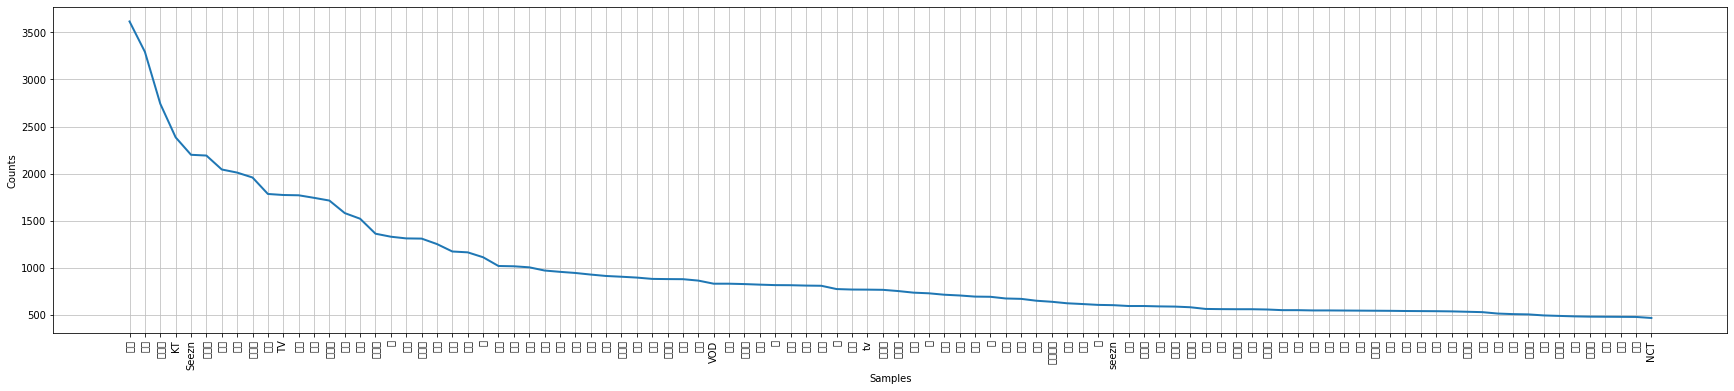

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(30,6))
ko.plot(100) 
plt.show()
plt.savefig('fig1.png', dpi=300)

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/batang.ttf').get_name()
rc('font', family=font_name)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = ko.vocab().most_common(500)

print(len(data))
data

500


[('시즌', 3616),
 ('영화', 3293),
 ('서비스', 2742),
 ('KT', 2385),
 ('Seezn', 2200),
 ('콘텐츠', 2192),
 ('이용', 2044),
 ('할인', 2011),
 ('드라마', 1959),
 ('제공', 1784),
 ('TV', 1773),
 ('무료', 1770),
 ('너무', 1743),
 ('모바일', 1714),
 ('사용', 1581),
 ('혜택', 1521),
 ('이벤트', 1362),
 ('앱', 1330),
 ('영상', 1312),
 ('다양한', 1310),
 ('방송', 1252),
 ('생각', 1173),
 ('음악', 1164),
 ('말', 1112),
 ('바로', 1019),
 ('채널', 1016),
 ('시청', 1005),
 ('시간', 971),
 ('함께', 957),
 ('금제', 945),
 ('사람', 928),
 ('추천', 913),
 ('김재환', 905),
 ('구매', 896),
 ('다시', 882),
 ('휴대폰', 880),
 ('국내', 879),
 ('선택', 864),
 ('VOD', 831),
 ('가입', 831),
 ('포인트', 827),
 ('지니', 821),
 ('팬', 816),
 ('올레', 815),
 ('보기', 811),
 ('오늘', 809),
 ('시', 774),
 ('시작', 769),
 ('tv', 768),
 ('실시간', 766),
 ('라이브', 753),
 ('진행', 736),
 ('집', 729),
 ('예능', 714),
 ('요즘', 706),
 ('가지', 694),
 ('면', 692),
 ('우리', 674),
 ('뮤직', 670),
 ('공개', 650),
 ('넷플릭스', 639),
 ('인기', 623),
 ('확인', 615),
 ('곡', 606),
 ('seezn', 603),
 ('감상', 594),
 ('플레이', 594),
 ('준비', 590),
 ('데이터'

In [ ]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

In [ ]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='C:/Windows/Fonts/batang.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

OSError: ignored

In [ ]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

FileNotFoundError: ignored